### meta-testの方法が違ったので、meta-testの精度が著者実装より悪い。

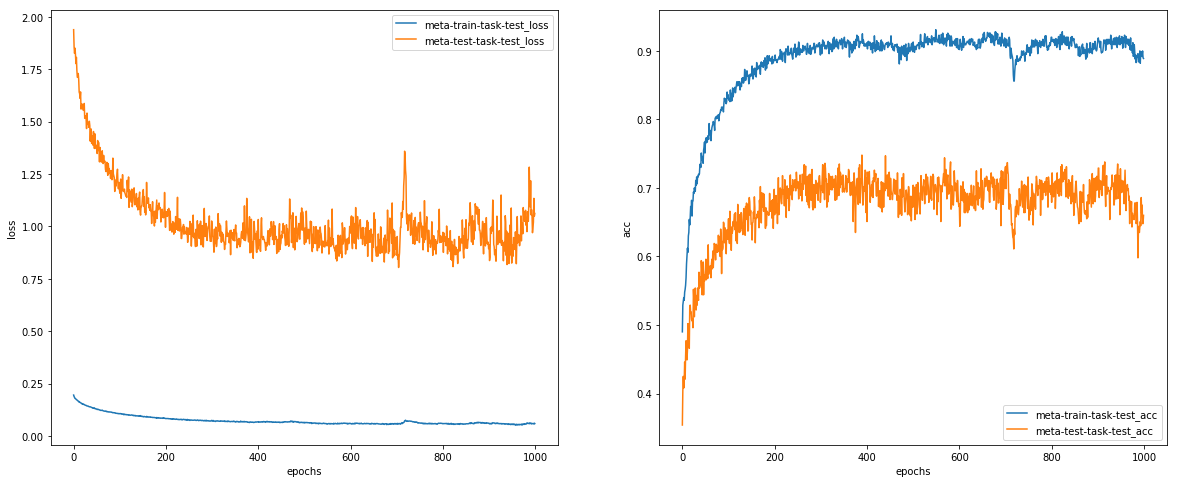

In [2]:
import os
import matplotlib.pyplot as plt

hist = sorted(os.listdir("../model"))
hist = [hi[:-3] for hi in hist] # remove '.pt'
hist = [hi.split("-") for hi in hist]

train_loss = [hi[2][-5:] for hi in hist]
train_acc = [hi[3][-5:] for hi in hist]
test_loss = [hi[4][-5:] for hi in hist]
test_acc = [hi[5][-5:] for hi in hist]

train_loss = [float(s) for s in train_loss]
train_acc = [float(s) for s in train_acc]
test_loss = [float(s) for s in test_loss]
test_acc = [float(s) for s in test_acc]

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.plot(train_loss, label="meta-train-task-test_loss")
plt.plot(test_loss, label="meta-test-task-test_loss")
plt.ylabel("loss"); plt.xlabel("epochs"); plt.legend()

plt.subplot(1,2,2)
plt.plot(train_acc, label="meta-train-task-test_acc")
plt.plot(test_acc, label="meta-test-task-test_acc")
plt.ylabel("acc"); plt.xlabel("epochs"); plt.legend()

# plt.savefig("plot_hist.png")
plt.show()

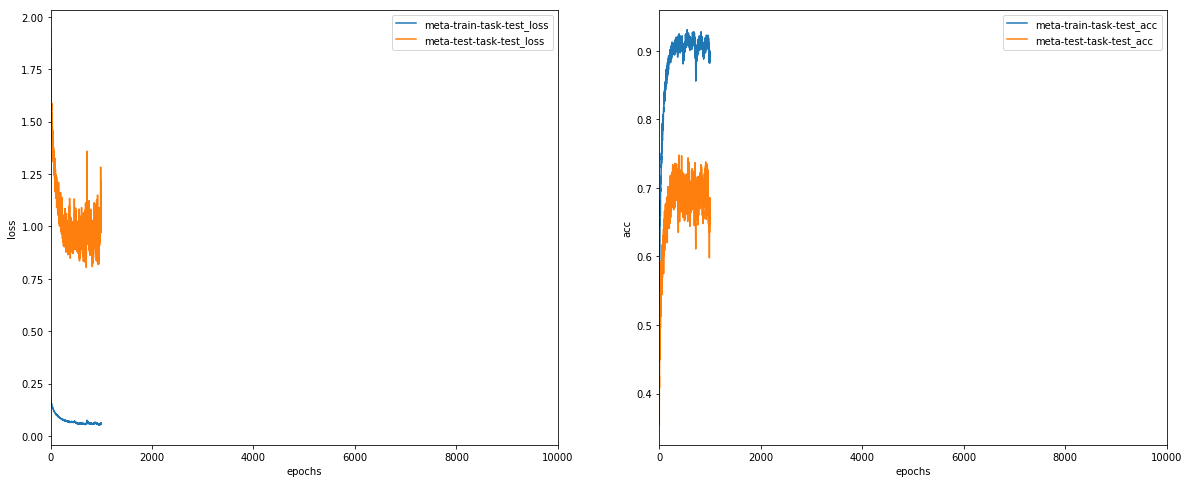

In [3]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.plot(train_loss, label="meta-train-task-test_loss")
plt.plot(test_loss, label="meta-test-task-test_loss")
plt.xlim([0, 10000])
plt.ylabel("loss"); plt.xlabel("epochs"); plt.legend()

plt.subplot(1,2,2)
plt.plot(train_acc, label="meta-train-task-test_acc")
plt.plot(test_acc, label="meta-test-task-test_acc")
plt.xlim([0, 10000])
plt.ylabel("acc"); plt.xlabel("epochs"); plt.legend()

# plt.savefig("plot_hist_bigscale.png")
plt.show()

### meta-testをし直した

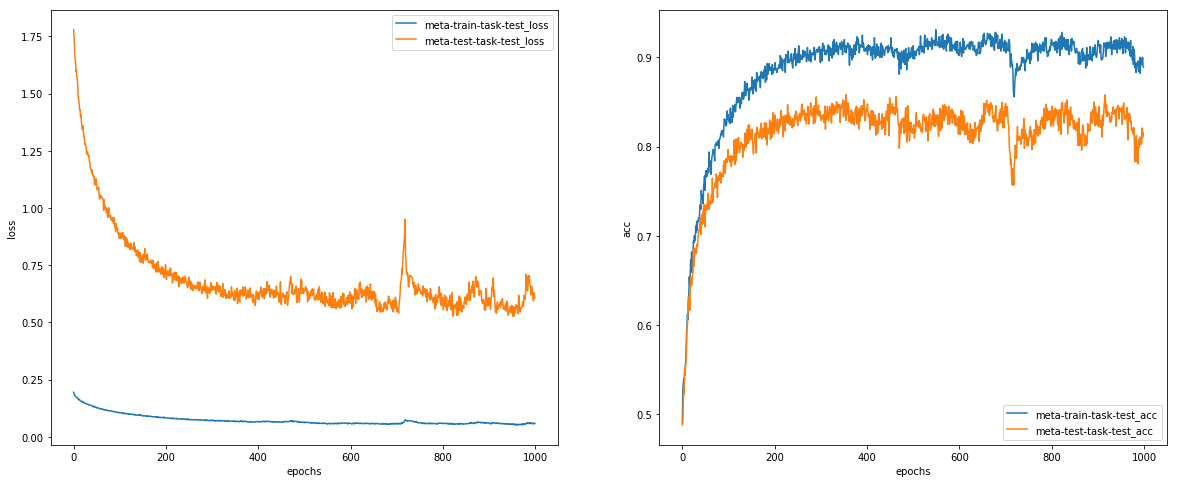

In [4]:
import numpy as np

del test_loss
del test_acc

meta_test_hist = np.load("meta-test-hist.npy")
test_loss = meta_test_hist[0]
test_acc = meta_test_hist[1]
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.plot(train_loss, label="meta-train-task-test_loss")
plt.plot(test_loss, label="meta-test-task-test_loss")
plt.ylabel("loss"); plt.xlabel("epochs"); plt.legend()

plt.subplot(1,2,2)
plt.plot(train_acc, label="meta-train-task-test_acc")
plt.plot(test_acc, label="meta-test-task-test_acc")
plt.ylabel("acc"); plt.xlabel("epochs"); plt.legend()

plt.savefig("plot_hist.png")
plt.show()

In [5]:
np.max(test_acc)

0.8582995951417003